# **First Pass** on NASA Challenge

This file is purely exploratory where we try to begin to understand the data. 
The first step is to try to load the data. We expect it to be fairly clean, but we will be applying a few generic operations. 
We are taking a semi-informed approach. We know a few basic things about the data, we will start exploring then validate on the paper describing the data. 

**Part1** *Generic Approach*
Operations here mostly are taking steps not specific to the data at hand. 

We should expect some variables related to the set information or time information. 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [3]:
#let's load the data and take a peak at the training file. 
df=pd.read_csv(r"C:\Users\Daniel\3D Objects\Nasa_maitenance\Challenge_Data\train.txt",delim_whitespace=True, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [8]:
#Okay now the row count
print(df[0].count())

45918


In [3]:
#Let's check for any null entries
df.isnull().values.any()

False

In [19]:
#Check for any strings:
df.applymap(type).eq(str).all()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

From this look most of our data appears to be continuous values. Depending on precision and range, some of these may be better thought of as integers. 

We have a couple perfect hundreds, which might be percentages. 

The second value is counting up while the first is static. These might be our set information. Nothing here looks like a time or date. 

Let's dig a layer deeper. 

In [4]:
#First half of columns
df.loc[:,:13].describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,11.596773,282.469820,2228.406355,8523.545525
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,5.451857,146.539301,145.582047,336.780672
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,5.710000,136.750000,1914.850000,7988.740000
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,5.720000,139.662500,2211.850000,8320.740000
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,9.030000,194.630000,2223.050000,8359.435000
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,15.490000,394.100000,2323.960000,8777.170000
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,21.610000,555.720000,2388.360000,9216.830000


In [5]:
#Second half of columns
df.loc[:,13:].describe()

,13,14,15,16,17,18,19,20,21,22,23,24,25
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,8523.545525,1.094971,42.991879,265.943344,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282
std,336.780672,0.127832,3.243475,138.163656,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954
min,7988.740000,0.930000,36.210000,129.240000,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600
25%,8320.740000,1.020000,41.930000,131.360000,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600
50%,8359.435000,1.020000,42.390000,183.170000,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200
75%,8777.170000,1.260000,45.380000,371.250000,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200
max,9216.830000,1.300000,48.390000,523.460000,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500


We can see that those entries are capped at 100. Not only that, but some entries are have clean min and max values, and even quadrant values. This lends heavy credence to what we were saying before. Let's test a few columns below. 

In [6]:
print(df[0].unique()) #integers only found

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218]


In [7]:
print(df[4].unique())
#This is not efficient but it doesn't really matter for the file size we are working with here. 
unique_counts=[]
for column in df:
    unique_counts.append(len(df[column].unique()))
print("Unique Values")
print(unique_counts)

[ 20. 100.  60.   0.  40.  80.]
Unique Values
[218, 357, 536, 105, 6, 6, 1571, 11839, 14713, 6, 14, 2004, 880, 20945, 8, 671, 1633, 507, 14250, 8210, 2, 49, 6, 2, 500, 16970]


Column 23 has only 2 values! This is not behaving like an integer column. Let's keep this in mind. 
Let's discuss some major points with sensor and physical values. Often there are bits reserved for specific purposes and the range is interpreted later. Examples of reserved bits can include error, sign or overflow, with multibyte messages able to carry more. Consequently, we shouldn't be surprised to see close to see messages filling odd bit sizes. At 45k messages, we should expect smaller maximum bit size messages to fill all or close to all stochastically, while 12+bit data to be mostly filled, but partly unfilled (3 values here meet that criteria). If this is taken from raw sensor data, we don't see most cover the full range. Some go further and cover strange ranges. 

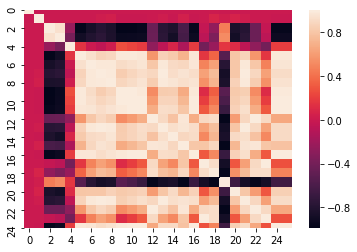

<Figure size 1080x1080 with 0 Axes>

In [8]:
#Now let's look at correlations and shapes. We want a subsample
corrs=df.corr()
sns.heatmap(corrs)
plt.figure(figsize=(15,15))
plt.show()

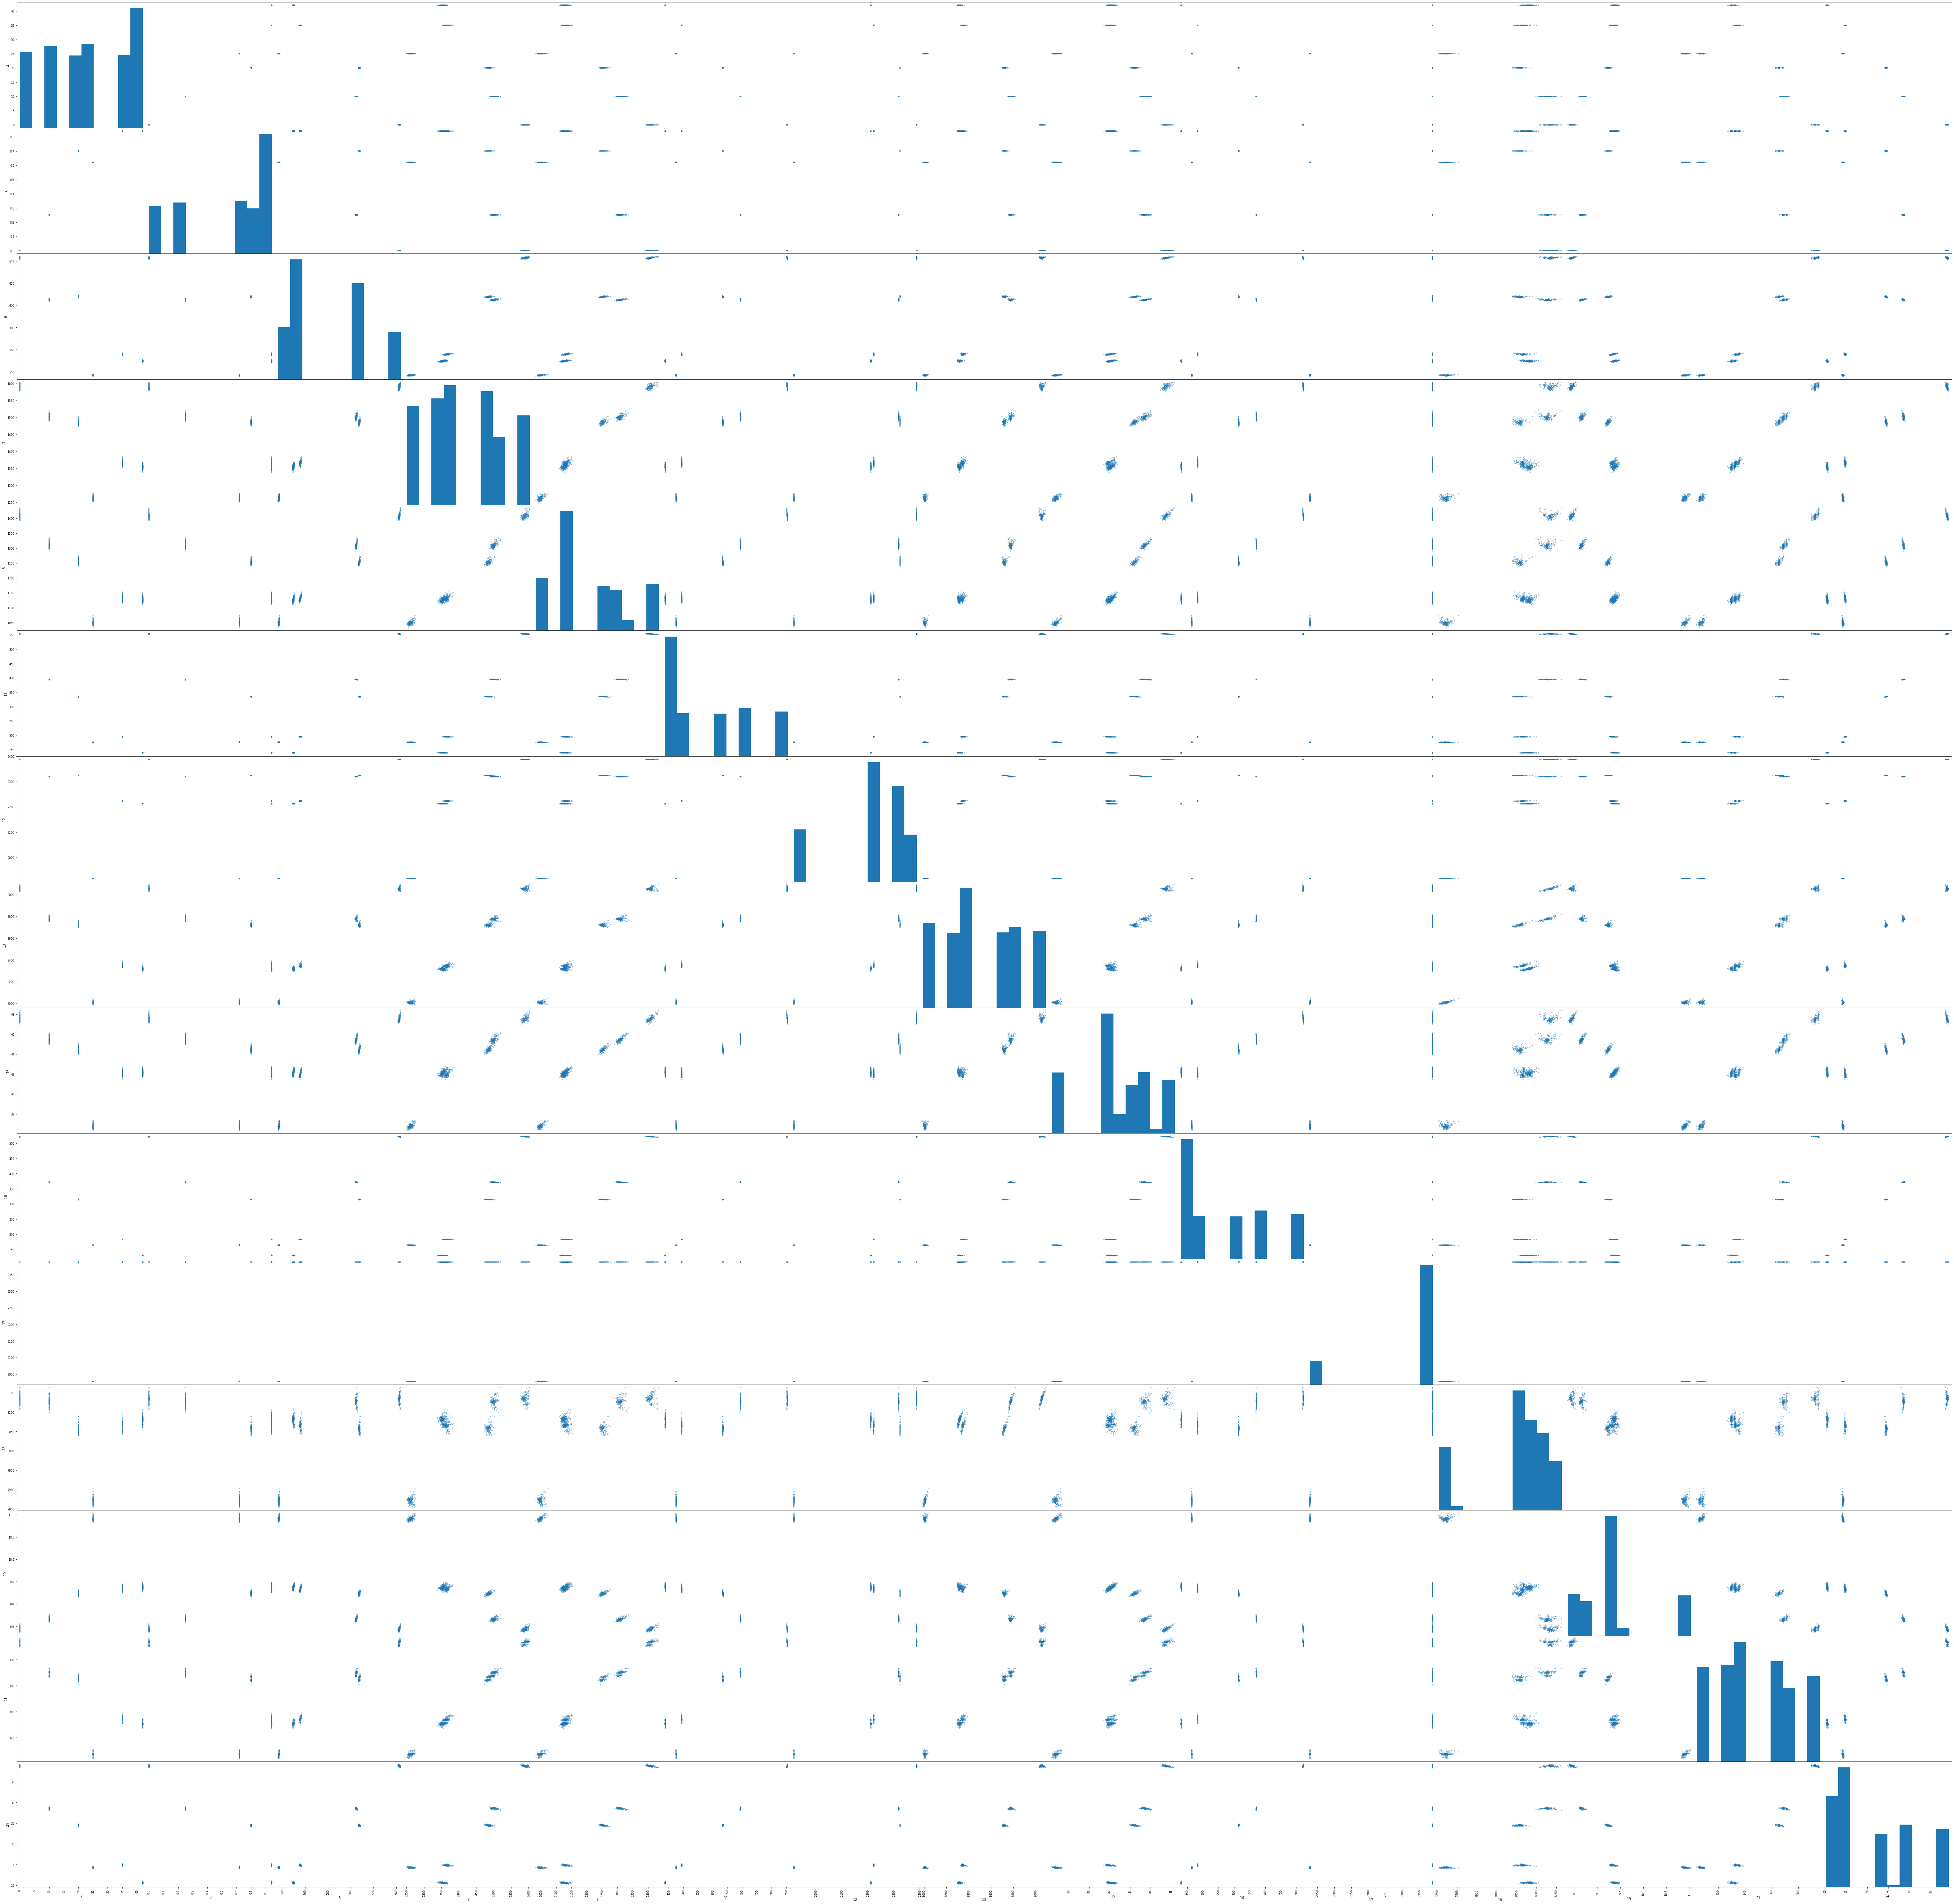

In [9]:
#Let's remove entries with little granularity. Scatterplots don't make sense for these. 
selected_columns=[]
for x in range(0,25):
   if unique_counts[x]>20:
        selected_columns.append(x)
reduced_df=df.loc[0:1000,selected_columns[2:]]
axes1=pd.plotting.scatter_matrix(reduced_df, alpha=.5,figsize=(100,100))

We see highly correlated data. We can see a strange structure in the first few variables and at 19. The first few columns are likely different kinds of variables then the rest. 


This is the first thousand entries only, not a random selection. However, we can seem some extremely powerful trends and features already. Many of the variables are highly clustered with local spread. This is good to see. Even if we don't get to it, we can absolutely simplify the problem by reducing allowed values if we want.This also suggests different algorithm handling.

In [ ]:
#We can grab random entries as well.

**Part 2** Gnostic and time-like approach
We can confirm from the readme that the first two values are sets of operational cycles and after that, the first 3 values are settings (0-5). From the last scatterplot we can also infer that the data does depend on the settings. 

The max length of a run is <400 so we may not be able to seperate the noise too well. Let's look at sensor 19.

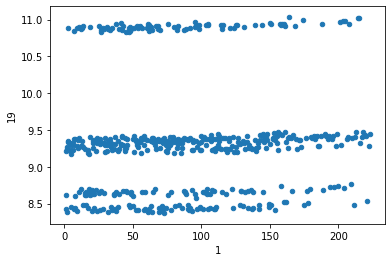

In [107]:
#Blind poke at our weird one that goes up with time. We can see multiple runs in this.
df[:500].plot.scatter(x=1,y=19)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45785,218,1,0.0027,0.0011,100.0,518.67,642.81,1592.30,1404.63,14.62,...,521.25,2388.10,8131.74,8.4762,0.03,392,2388,100.0,38.79,23.3613
45786,218,2,0.0010,0.0000,100.0,518.67,642.53,1586.57,1403.73,14.62,...,521.17,2388.06,8130.81,8.4179,0.03,392,2388,100.0,38.91,23.3885
45787,218,3,0.0025,0.0010,100.0,518.67,642.40,1592.64,1404.54,14.62,...,521.86,2388.11,8130.66,8.4115,0.03,392,2388,100.0,38.81,23.3561
45788,218,4,41.9984,0.8400,40.0,445.00,549.58,1352.46,1131.48,3.91,...,130.32,2387.78,8076.76,9.3572,0.02,331,2212,100.0,10.51,6.3894


array([[<AxesSubplot:title={'center':"(1, 'max')"}>]], dtype=object)

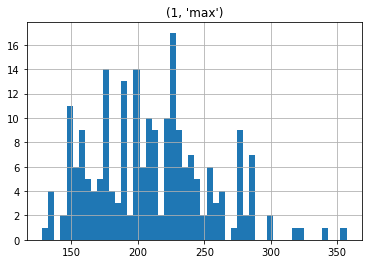

In [5]:
#Generated expected lifetitme
lifedf=df.groupby(0).agg({1:['max']})
life_list=lifedf[1,"max"].tolist()
lifedf.hist(bins=50)

In [43]:
#Clustering could line up with groups. 
print(len(life_list))

218


In [6]:
#Let's add a fractional change to failure
def listvals(value):
    value=int(value-1)
    return life_list[value]

df["Degrade"]=(df[0].apply(listvals)-df[1])/df[0].apply(listvals)
df["TotalLife"]=df[0].apply(listvals)
df["Degrade"].head()

0    0.995516
1    0.991031
2    0.986547
3    0.982063
4    0.977578
Name: Degrade, dtype: float64

In [ ]:
Checking important variables that change in time

In [13]:
correlation_time=[]
correlation_life=[]
for x in range(2,26):
    correlation_time.append(df["Degrade"].corr(df[x]))
    correlation_life.append(df["TotalLife"].corr(df[x]))
print(correlation_time)
print(correlation_life)

[-0.005139129653031863, -0.007729612040603963, 0.001556684717607782, 0.002974199685364071, -0.004984977935523924, -0.028860716560395808, -0.04125379001954903, 0.0038418918001661565, 0.003426598547892519, 0.005614744312726504, -0.0006679208472267655, -0.02057021183886057, 0.008096029764128225, -0.05069694317891254, 0.005421462568160732, -0.0023625713434574573, -0.06210448383153283, -0.03653885257983349, -0.07200324058204918, -0.02881186314297093, -0.000137918951053408, -0.0017289108332433916, 0.009772412508718598, 0.00985001126036548]
[-0.004807967226788319, -0.004316480721264458, 0.0038079891092595453, 0.005478056370636048, 0.0036914070641135828, 0.0014001600861062702, -3.0687812300470864e-05, 0.005281811395247532, 0.0050278382169440935, 0.004793130591644974, 0.0007621271089267604, 0.010231433586221054, 0.0024178823133162376, -0.003031851476544321, 0.004760813508657117, -0.0019367134098524396, 0.0272307182645078, -0.0032425661584441364, -0.005422619121245902, 0.001511769120028645, 0.00

In [14]:
count=2
for values in correlation_time:
    if np.abs(values)>0.01:
        print("{}:{}".format(count,values))
    count+=1

7:-0.028860716560395808
8:-0.04125379001954903
13:-0.02057021183886057
15:-0.05069694317891254
18:-0.06210448383153283
19:-0.03653885257983349
20:-0.07200324058204918
21:-0.02881186314297093


In [15]:
count=2
for values in correlation_life:
    if np.abs(values)>0.01:
        print("{}:{}".format(count,values))
    count+=1

13:0.010231433586221054
18:0.0272307182645078


<AxesSubplot:xlabel='1', ylabel='13'>

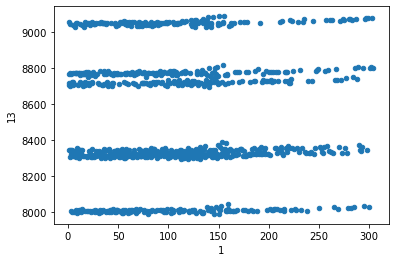

In [16]:
df[:1000].plot.scatter(x=1,y=13)

<AxesSubplot:xlabel='1', ylabel='20'>

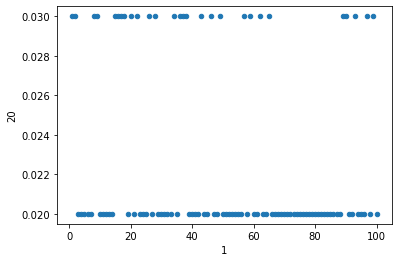

In [19]:
df[:100].plot.scatter(x=1,y=20)

We can see the largest impact variables. The next steps will be to attempt to check the variance from the current norm value and look at the 1-exp(-zx) function against variables as they approach the EoL.  